Coefficients: 
 [ 2.96046517e-02 -2.34641652e-03 -1.80392456e-02  2.34584592e-03
 -1.27303456e-02  4.10394425e-02 -3.79875801e-02 -4.81329366e-03
  6.87848811e-03 -4.29213173e-03  1.09100751e+00 -1.20956603e-02
 -2.97108450e-02 -5.26626864e-02 -1.41214123e-02  7.53189171e-02
 -4.56701418e-02 -1.33042137e-02 -1.38449501e-02  2.36543624e-05
  4.97195004e-02 -3.26744757e-02 -1.78805196e-02  1.11284154e-02
 -6.60413001e-03  5.79949438e-02 -4.58892134e-02 -1.09230520e-02
 -3.07982531e-03  7.45445720e-03 -3.81376318e-05]
Root mean squared error: 0.94
Mean absolute error: 0.61
R-squared: 0.99


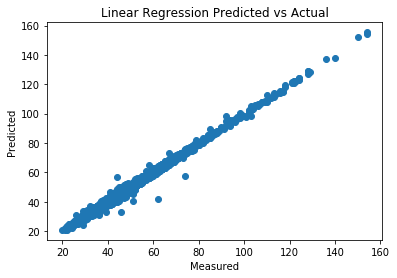

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

df = pd.read_csv('psi_df_2016_2019.csv')

df['north_1'] = df.north.shift(periods=1)
df['north_2'] = df.north.shift(periods=2)
df['north_3'] = df.north.shift(periods=3)
df['north_4'] = df.north.shift(periods=4)
df['north_5'] = df.north.shift(periods=5)
df['national_1'] = df.national.shift(periods=1)
df['national_2'] = df.national.shift(periods=2)
df['national_3'] = df.national.shift(periods=3)
df['national_4'] = df.national.shift(periods=4)
df['national_5'] = df.national.shift(periods=5)
df['south_1'] = df.south.shift(periods=1)
df['south_2'] = df.south.shift(periods=2)
df['south_3'] = df.south.shift(periods=3)
df['south_4'] = df.south.shift(periods=4)
df['south_5'] = df.south.shift(periods=5)
df['east_1'] = df.east.shift(periods=1)
df['east_2'] = df.east.shift(periods=2)
df['east_3'] = df.east.shift(periods=3)
df['east_4'] = df.east.shift(periods=4)
df['east_5'] = df.east.shift(periods=5)
df['central_1'] = df.central.shift(periods=1)
df['central_2'] = df.central.shift(periods=2)
df['central_3'] = df.central.shift(periods=3)
df['central_4'] = df.central.shift(periods=4)
df['central_5'] = df.central.shift(periods=5)
df['west_1'] = df.west.shift(periods=1)
df['west_2'] = df.west.shift(periods=2)
df['west_3'] = df.west.shift(periods=3)
df['west_4'] = df.west.shift(periods=4)
df['west_5'] = df.west.shift(periods=5)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[df.timestamp >= '2016-02-08 23:00:00+08:00']
df['day_week'] = df['timestamp'].dt.weekday_name
df['day_week_cat'] = df.day_week.astype("category").cat.codes
df = df.drop(['day_week'], axis=1)
df = df.drop(['timestamp'], axis=1)
df = df.dropna()
y_north = df['north']
X = df.iloc[:, 6:]
y_south = df['south']
y_national = df['national']
y_central = df['central']
y_east = df['east']
y_west = df['west']

X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X, y_north, test_size=.3, random_state=7)
X_train_national, X_test_national, y_train_national, y_test_national = train_test_split(X, y_national, test_size=.3, random_state=7)
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X, y_south, test_size=.3, random_state=7)
X_train_central, X_test_central, y_train_central, y_test_central = train_test_split(X, y_central, test_size=.3, random_state=7)
X_train_east, X_test_east, y_train_east, y_test_east = train_test_split(X, y_east, test_size=.3, random_state=7)
X_train_west, X_test_west, y_train_west, y_test_west = train_test_split(X, y_west, test_size=.3, random_state=7)

# Create linear regression object
regr_n = LinearRegression()
regr_na = LinearRegression()
regr_s = LinearRegression()
regr_c = LinearRegression()
regr_e = LinearRegression()
regr_w = LinearRegression()

# Train the model using the training sets
regr_n.fit(X_train_north, y_train_north)
regr_na.fit(X_train_national, y_train_national)
regr_s.fit(X_train_south, y_train_south)
regr_e.fit(X_train_east, y_train_east)
regr_c.fit(X_train_central, y_train_central)
regr_w.fit(X_train_west, y_train_west)

# Make predictions using the testing set
lin_pred = regr_s.predict(X_test_south)
linear_regression_score = regr_n.score(X_test_south, y_test_south)

# The coefficients
print('Coefficients: \n', regr_s.coef_)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test_south, lin_pred)))

# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test_south, lin_pred))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test_south, lin_pred))
plt.scatter(y_test_south, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

rng = pd.DataFrame()
rng['date'] = pd.date_range('2019-06-11 14:00:00', periods=700, freq='10H')
rng['day_week'] = rng['date'].dt.weekday_name
rng['day_week_cat'] = rng.day_week.astype("category").cat.codes

i = 0
while i < 700:
    future_north = regr_n.predict(X.iloc[4:, :])
    future_national = regr_na.predict(X.iloc[4:, :])
    future_south = regr_s.predict(X.iloc[4:, :])
    future_east = regr_e.predict(X.iloc[4:, :])
    future_central = regr_c.predict(X.iloc[4:, :])
    future_west = regr_w.predict(X.iloc[4:, :])
    X.loc[len(X) + 5] = 0
    X.iloc[len(X) - 1, 0] = future_north[len(future_north) - 1]
    X['north_2'] = X.north_1.shift(periods=1)
    X['north_3'] = X.north_1.shift(periods=2)
    X['north_4'] = X.north_1.shift(periods=3)
    X['north_5'] = X.north_1.shift(periods=4)

    X.iloc[len(X) - 1, 5] = future_national[len(future_national) - 1]
    X['national_2'] = X.national_1.shift(periods=1)
    X['national_3'] = X.national_1.shift(periods=2)
    X['national_4'] = X.national_1.shift(periods=3)
    X['national_5'] = X.national_1.shift(periods=4)

    X.iloc[len(X) - 1, 10] = future_south[len(future_south) - 1]
    X['south_2'] = X.south_1.shift(periods=1)
    X['south_3'] = X.south_1.shift(periods=2)
    X['south_4'] = X.south_1.shift(periods=3)
    X['south_5'] = X.south_1.shift(periods=4)

    X.iloc[len(X) - 1, 15] = future_east[len(future_east) - 1]
    X['east_2'] = X.east_1.shift(periods=1)
    X['east_3'] = X.east_1.shift(periods=2)
    X['east_4'] = X.east_1.shift(periods=3)
    X['east_5'] = X.east_1.shift(periods=4)

    X.iloc[len(X) - 1, 20] = future_central[len(future_central) - 1]
    X['central_2'] = X.central_1.shift(periods=1)
    X['central_3'] = X.central_1.shift(periods=2)
    X['central_4'] = X.central_1.shift(periods=3)
    X['central_5'] = X.central_1.shift(periods=4)

    X.iloc[len(X) - 1, 25] = future_west[len(future_west) - 1]
    X['west_2'] = X.west_1.shift(periods=1)
    X['west_3'] = X.west_1.shift(periods=2)
    X['west_4'] = X.west_1.shift(periods=3)
    X['west_5'] = X.west_1.shift(periods=4)
    X.iloc[len(X) - 1, 30] = rng['day_week_cat'].iloc[i]
    i += 1

















In [5]:
X

,north_1,north_2,north_3,north_4,north_5,national_1,national_2,national_3,national_4,national_5,...,central_2,central_3,central_4,central_5,west_1,west_2,west_3,west_4,west_5,day_week_cat
5,55.000000,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,5
6,55.000000,55.000000,NaN,NaN,NaN,59.000000,59.000000,NaN,NaN,NaN,...,56.000000,NaN,NaN,NaN,56.000000,56.000000,NaN,NaN,NaN,5
7,55.000000,55.000000,55.000000,NaN,NaN,59.000000,59.000000,59.000000,NaN,NaN,...,56.000000,56.000000,NaN,NaN,56.000000,56.000000,56.000000,NaN,NaN,5
8,55.000000,55.000000,55.000000,55.000000,NaN,60.000000,59.000000,59.000000,59.000000,NaN,...,57.000000,56.000000,56.000000,NaN,56.000000,56.000000,56.000000,56.000000,NaN,5
9,56.000000,55.000000,55.000000,55.000000,55.000000,60.000000,60.000000,59.000000,59.000000,59.000000,...,57.000000,57.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5
10,57.000000,56.000000,55.000000,55.000000,55.000000,61.000000,60.000000,60.000000,59.000000,59.000000,...,57.000000,57.000000,57.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5
11,57.000000,57.000000,56.000000,55.000000,55.000000,61.000000,61.000000,60.000000,60.000000,59.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,56.000000,56.000000,56.000000,5
12,57.000000,57.000000,57.000000,56.000000,55.000000,62.000000,61.000000,61.000000,60.000000,60.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,56.000000,56.000000,56.000000,5
13,58.000000,57.000000,57.000000,57.000000,56.000000,62.000000,62.000000,61.000000,61.000000,60.000000,...,57.000000,57.000000,57.000000,57.000000,58.000000,57.000000,57.000000,56.000000,56.000000,5
14,58.000000,58.000000,57.000000,57.000000,57.000000,62.000000,62.000000,62.000000,61.000000,61.000000,...,58.000000,57.000000,57.000000,57.000000,58.000000,58.000000,57.000000,57.000000,56.000000,5
